In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Overfitting, Underfitting

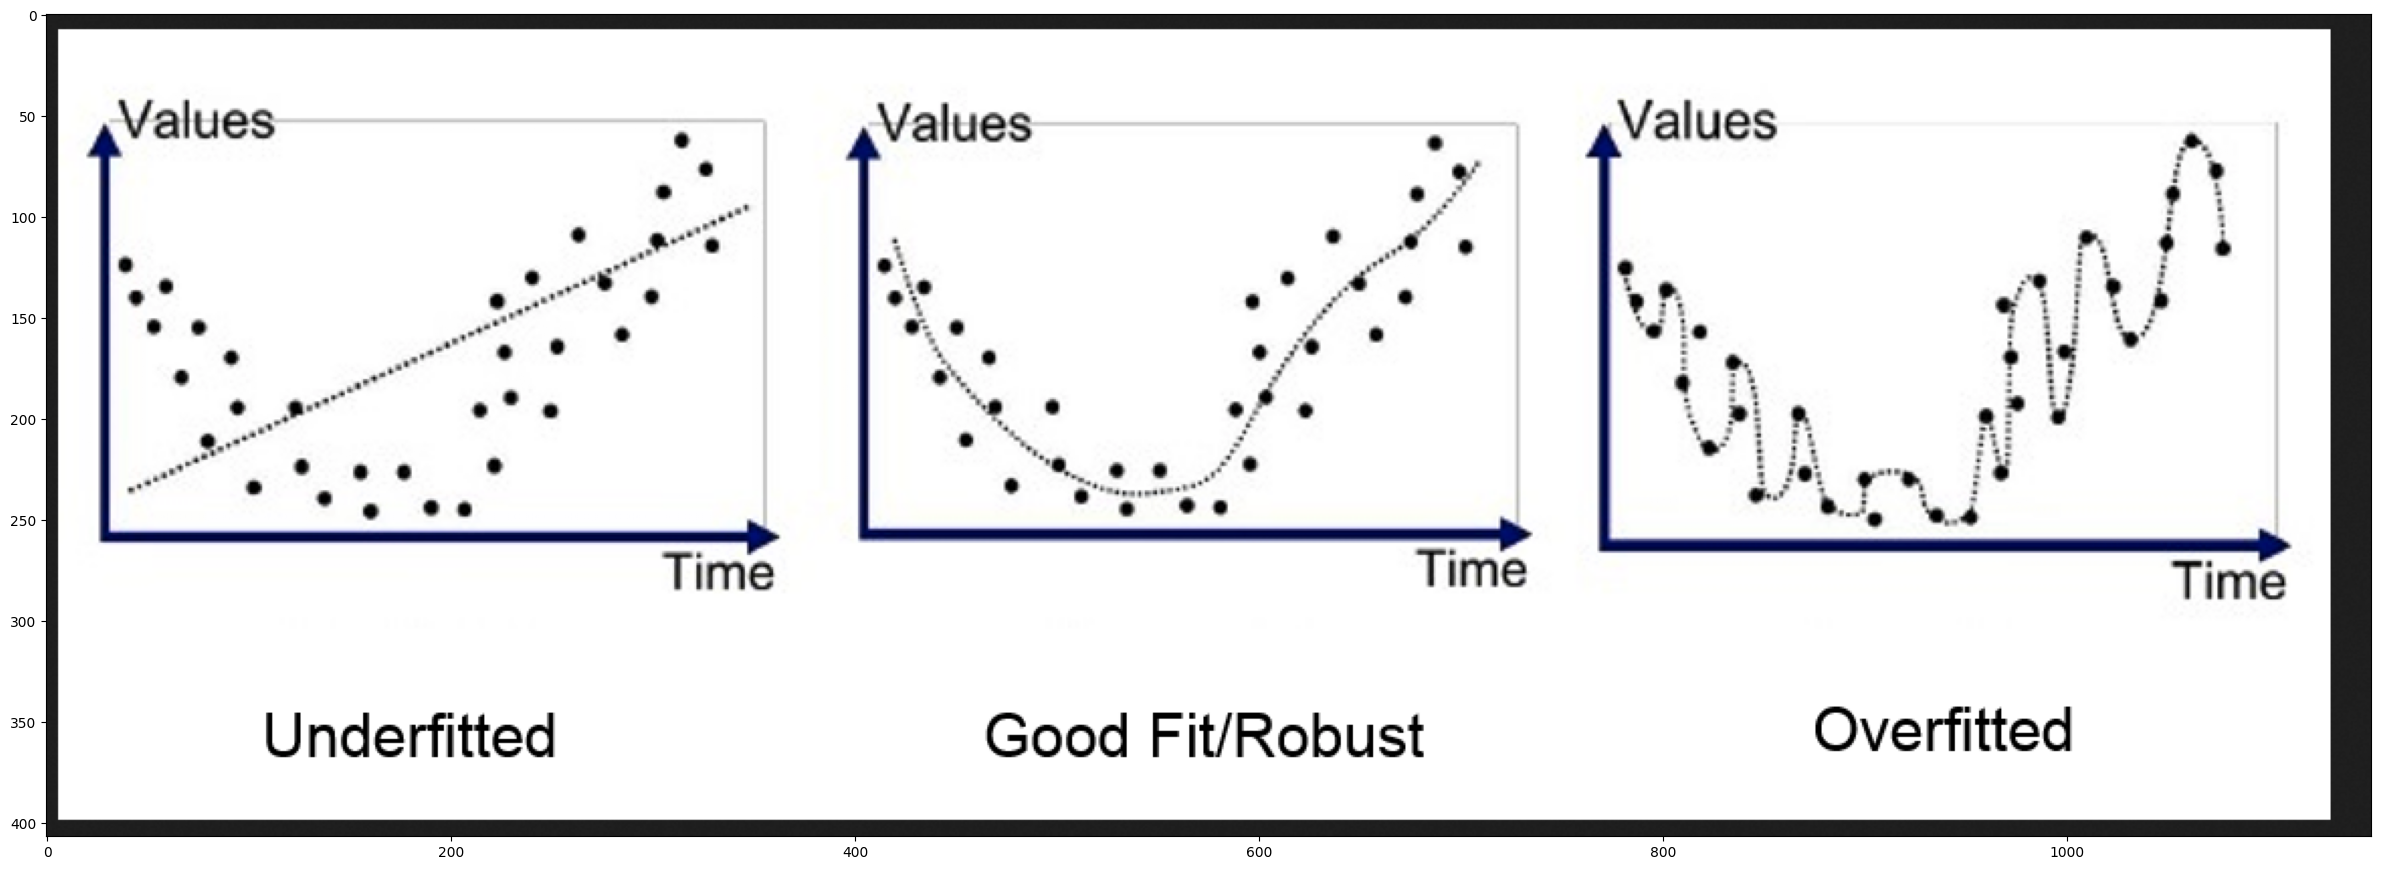

In [4]:
# https://www.researchgate.net/publication/379846879_Utilizing_Machine_Learning_to_Predict_the_Malignancy_of_a_Breast_Tumor
im = plt.imread('./img/over_underfitting1.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

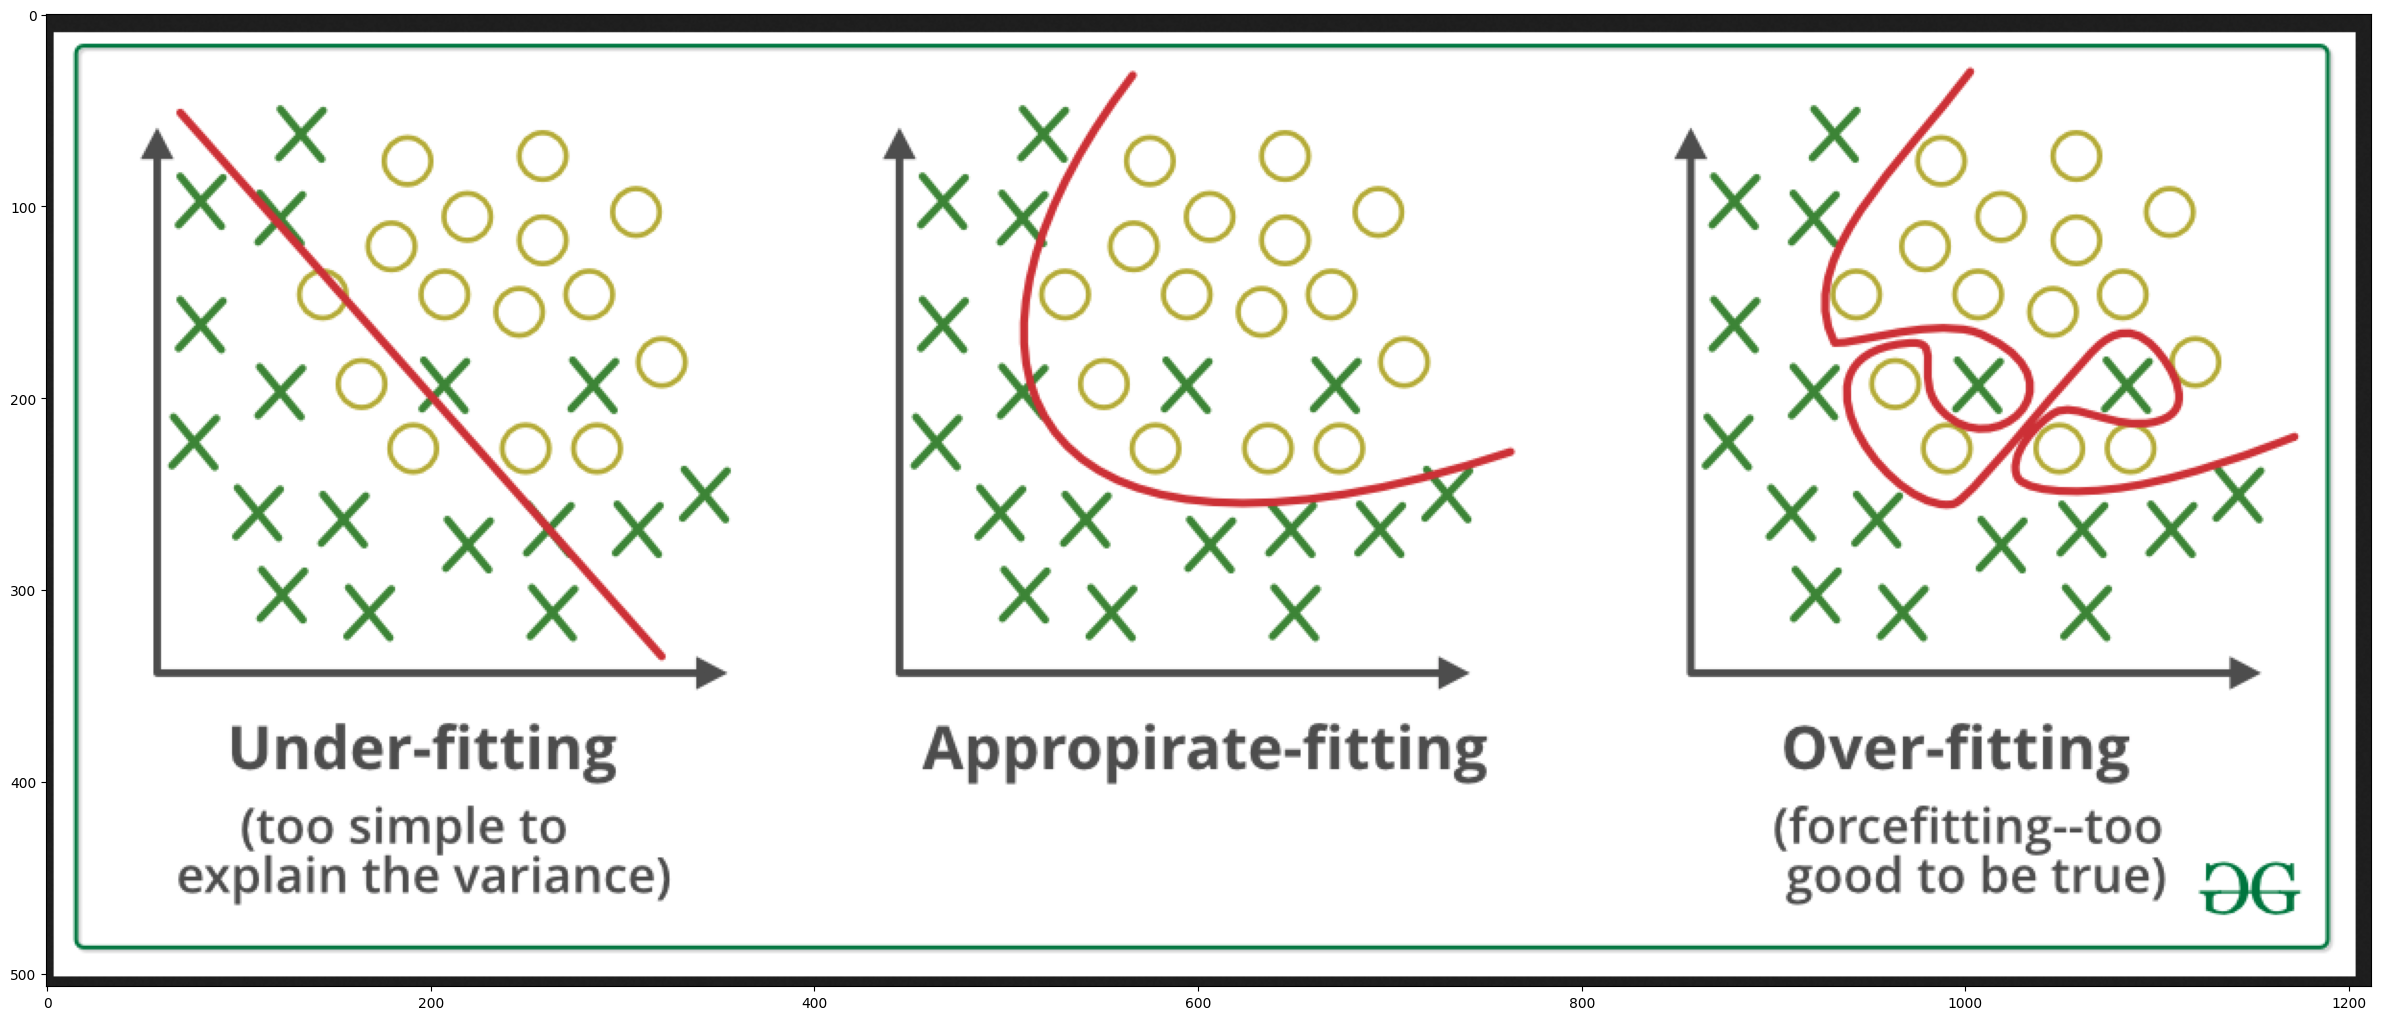

In [6]:
# https://medium.com/@rinu.gour123/deep-neural-networks-with-python-6b599a5b1af9
im = plt.imread('./img/over_underfitting2.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

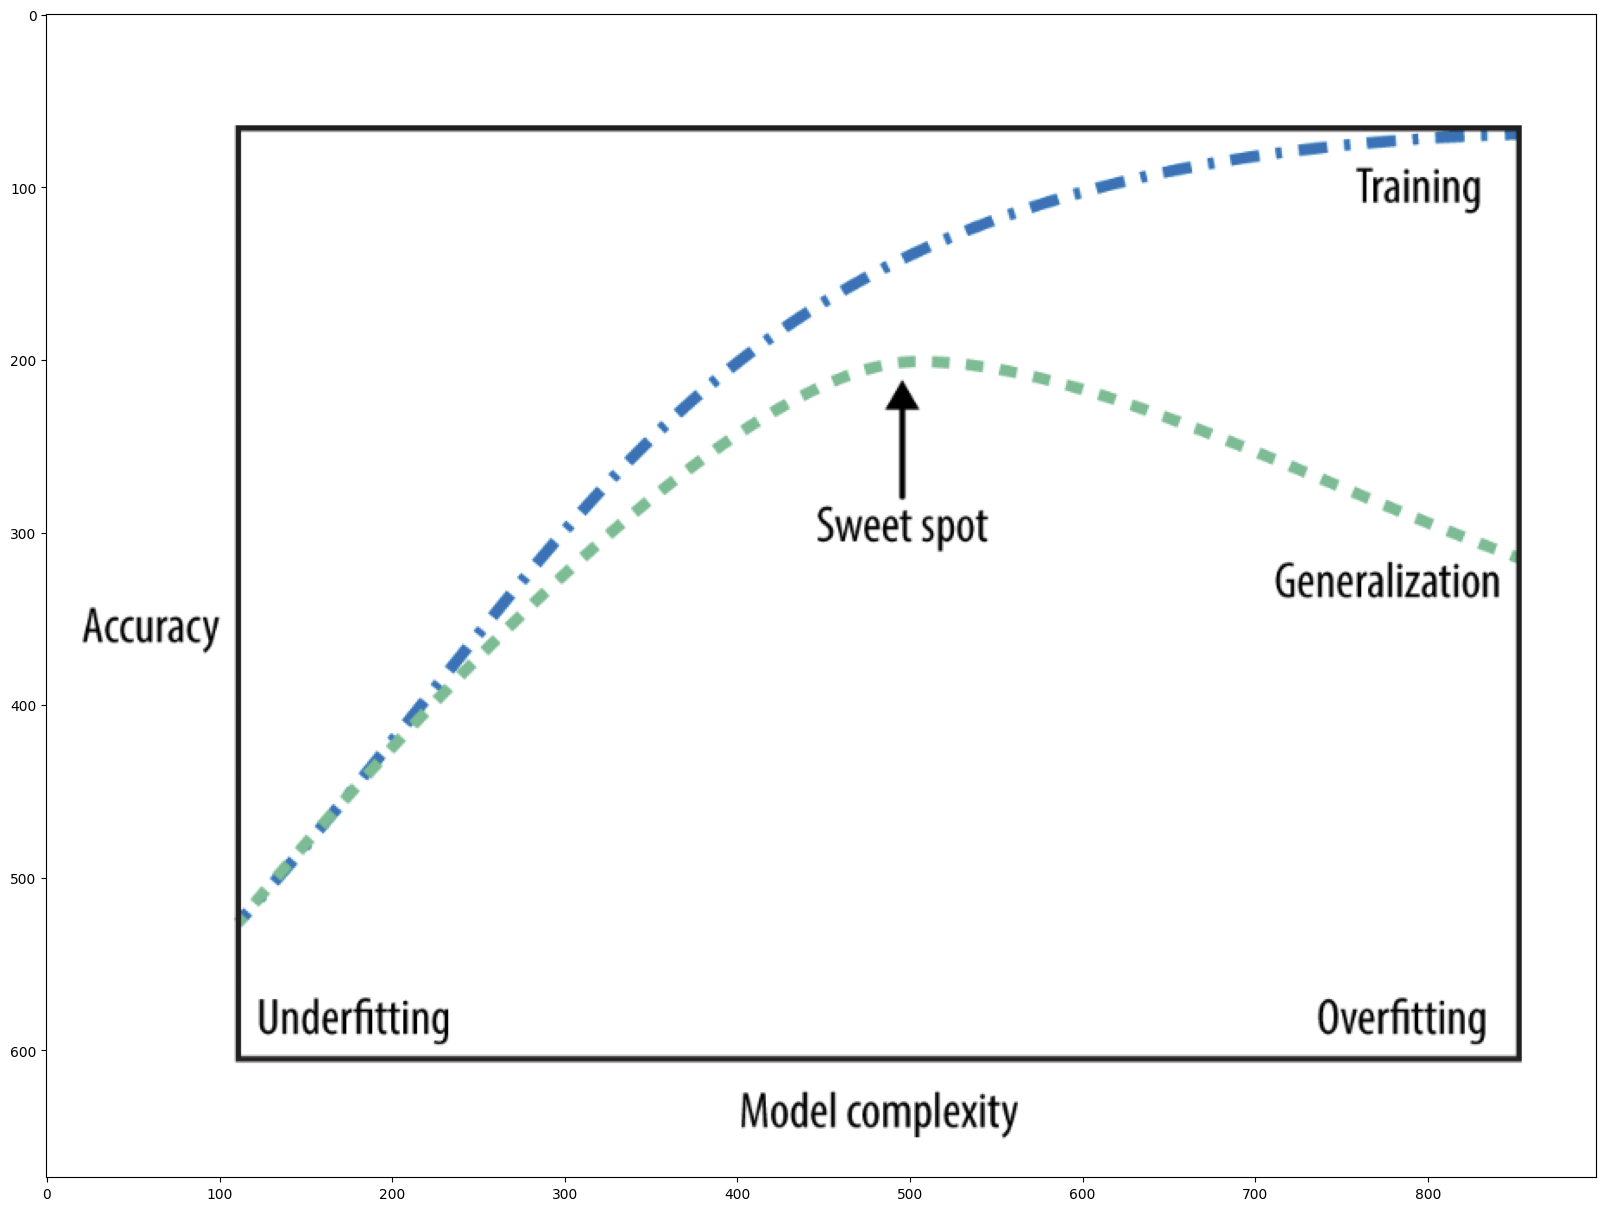

In [9]:
# Livro Introduction to Machine Learning with Python
im = plt.imread('./img/tradeoff_overfitting_underfitting.png')
plt.figure(figsize = (20,20))
plt.imshow(im)
plt.show()

# Viés e Variância

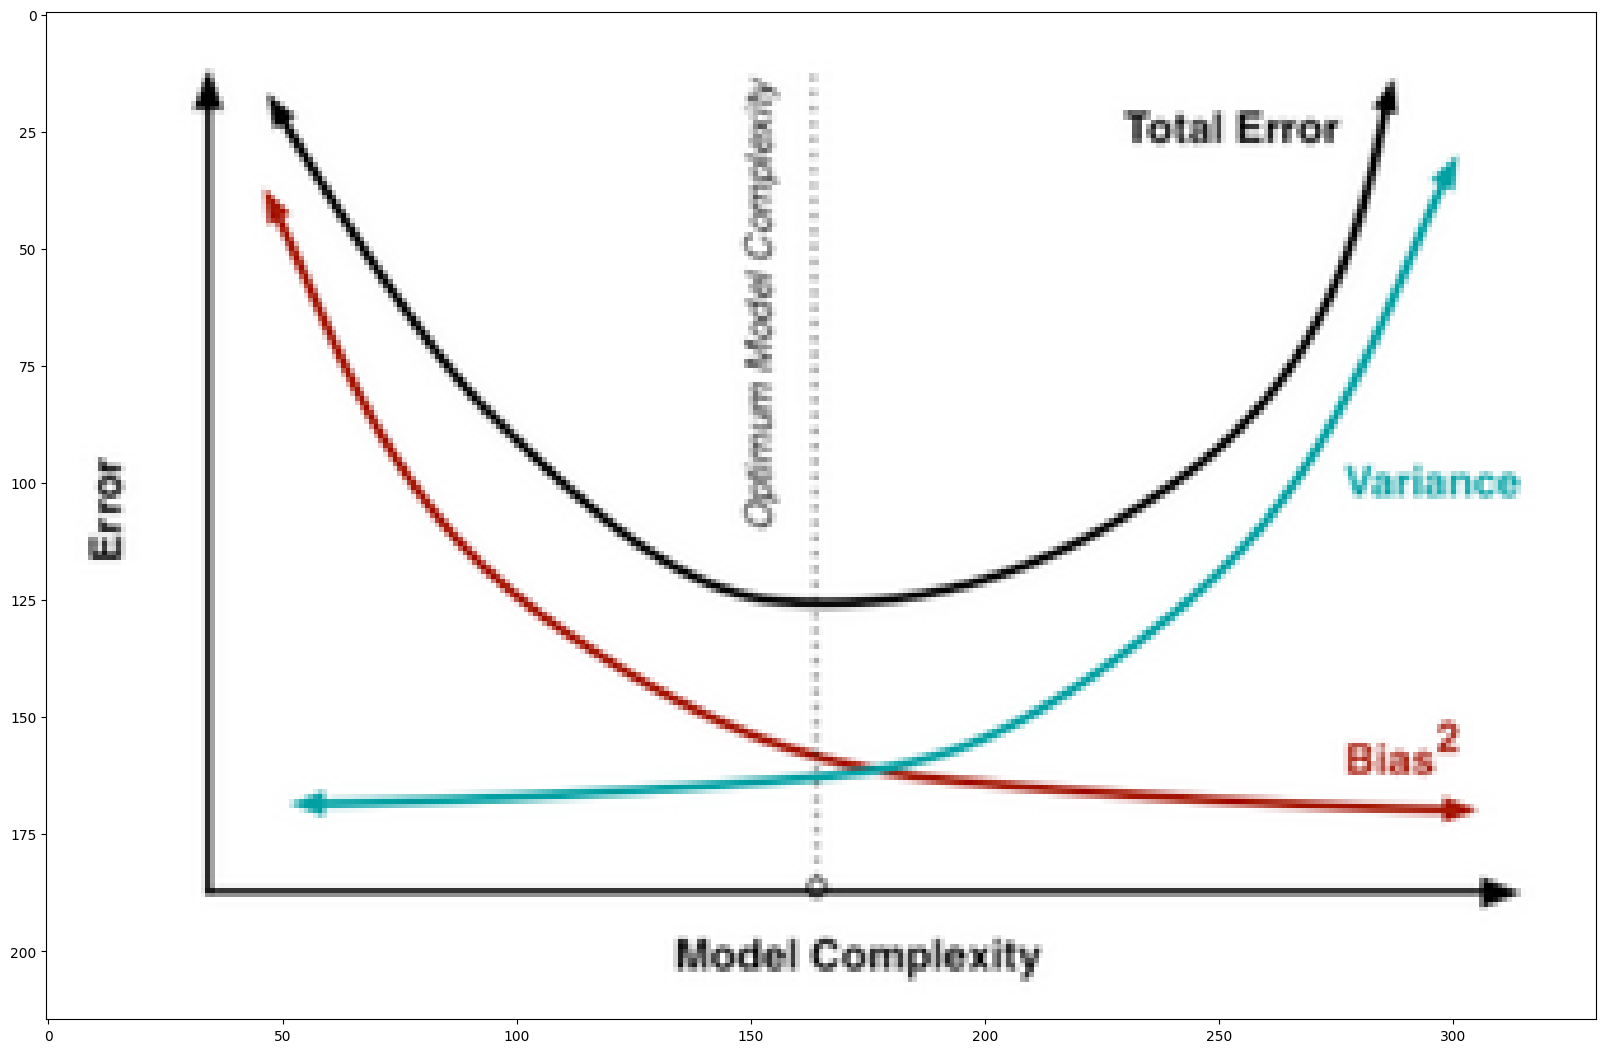

In [28]:
# http://scott.fortmann-roe.com/docs/BiasVariance.html
im = plt.imread('./img/vies_variancia.png')
plt.figure(figsize = (20,20))
plt.imshow(im)
plt.show()

# Validação Cruzada

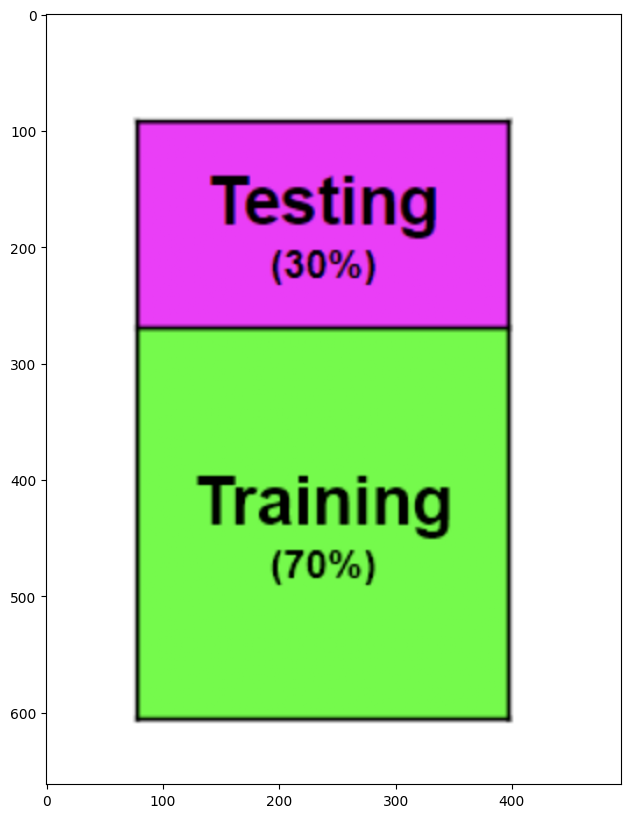

In [12]:
# 
im = plt.imread('./img/treino_teste.png')
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

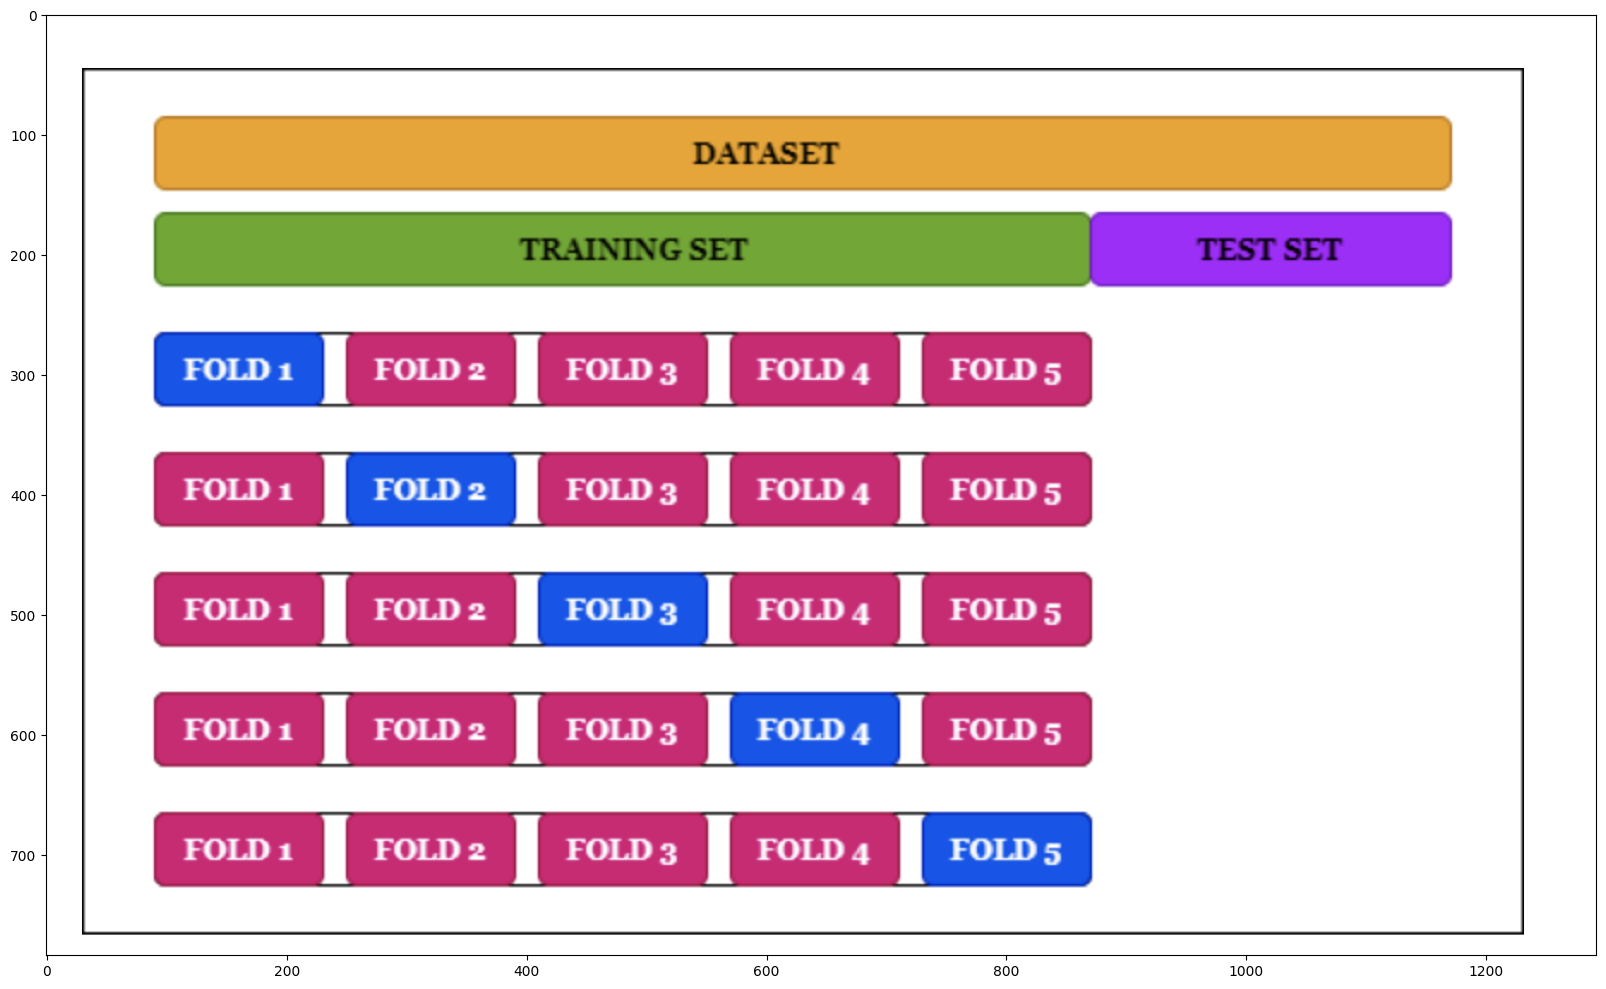

In [14]:
# 
im = plt.imread('./img/cv.png')
plt.figure(figsize = (20,20))
plt.imshow(im)
plt.show()

In [15]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('kc_house_data.csv')
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0


In [17]:
x = df.drop('price', axis=1)
y = df['price']

# normalização dos dados
min_max_scaler = StandardScaler()
x = min_max_scaler.fit_transform(x)

In [18]:
# Criando o modelo de regressão linear
linear_regressor = LinearRegression()

In [19]:
# Definindo o número de folds
k = 5

In [20]:
# Criando o objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [21]:
# Armazenará os scores de cada fold
mape_scores = []

## Utilizando todo o conjunto de dados para treino e validação

In [22]:
# Realizando o K-Fold Cross-Validation
for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Treinando o modelo no conjunto de treino
    linear_regressor.fit(x_train, y_train)

    # Fazendo previsões no conjunto de validação
    y_pred = linear_regressor.predict(x_val)

    # Calculando o erro percentual absoluto médio (MAPE)
    mape = mean_absolute_percentage_error(y_val, y_pred)

    # Armazenando o MAPE para cada fold
    mape_scores.append(mape)

In [23]:
mape_scores

[0.34395818800589684,
 0.34797610372682075,
 0.34657027263314844,
 0.34294743291873186,
 0.34968140400493636]

In [24]:
# Calculando o MAPE médio
mape_mean = np.mean(mape_scores)

print(f"MAPE médio: {mape_mean}")

MAPE médio: 0.34622668025790687


## Separando 10% dos dados para o teste final

In [25]:
# Separando os dados de treino (para a validação cruzada) e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Criando o modelo de regressão linear
linear_regressor = LinearRegression()

# Definindo o número de folds
k = 5

# Criando o objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Armazenará os scores de cada fold
mape_scores = []

# Realizando o K-Fold Cross-Validation
for train_index, val_index in kf.split(x_train, y_train):
    x_train_cv, x_val = x[train_index], x[val_index]
    y_train_cv, y_val = y[train_index], y[val_index]

    # Treinando o modelo no conjunto de treino
    linear_regressor.fit(x_train_cv, y_train_cv)

    # Fazendo previsões no conjunto de validação
    y_pred = linear_regressor.predict(x_val)

    # Calculando o erro percentual absoluto médio (MAPE)
    mape = mean_absolute_percentage_error(y_val, y_pred)

    # Armazenando o MAPE para cada fold
    mape_scores.append(mape)

# Calculando o MAPE médio
mape_mean = np.mean(mape_scores)

print(f"MAPE médio: {mape_mean}")

MAPE médio: 0.3511047791823444


In [26]:
# Vendo a performance agora do modelo para o conjunto de teste

# Fazendo previsões no conjunto de teste
y_pred_2 = linear_regressor.predict(x_test)

# Calculando o erro percentual absoluto médio (MAPE)
mape_test = mean_absolute_percentage_error(y_test, y_pred_2)

print(f"MAPE: {mape_test}")

MAPE: 0.3513107105323694


# Ajuste de Hiperparâmetros

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [30]:
# Definindo os parâmetros a serem ajustados
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [31]:
# Criando o modelo
svr = SVR()

In [32]:
# Ajuste fino
clf = GridSearchCV(svr, parameters)

In [33]:
# Treinando o modelo com otimização
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [34]:
print(clf.cv_results_['params'])

[{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}]


In [35]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [36]:
df_results = pd.DataFrame(clf.cv_results_)
df_results.query("rank_test_score == 1")['params']

2    {'C': 10, 'kernel': 'linear'}
Name: params, dtype: object

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Definindo os parâmetros a serem ajustados
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Criando o modelo
svr = SVR()

# Ajuste fino com validação cruzada
clf = GridSearchCV(svr, parameters, cv=10)

# Treinando o modelo com otimização
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [38]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}
